# *description of data*

| **Attribute**             | **Description**                                              |
|---------------------------|--------------------------------------------------------------|
| Booking ID                | Unique reservation code.                                     |
| Adults                    | Number of adults.                                            |
| Children                  | Number of children.                                          |
| Weekend Nights            | Nights (Sat/Sun) stayed or booked.                           |
| Week Nights               | Nights (Mon-Fri) stayed or booked.                           |
| Meal Type                 | Chosen meal plan category.                                   |
| Parking                   | Car parking request (0 - No, 1 - Yes).                       |
| Room Type                 | Reserved room category (coded by INN Hotels).                |
| Lead Time                 | Days between booking and arrival.                            |
| Market Segment            | Market segment designation.                                  |
| Repeated Guest            | Repeated guest status (0 - No, 1 - Yes).                     |
| Previous Cancellations    | Prior bookings canceled by the customer.                     |
| Previous Non-Cancellations| Prior bookings not canceled by the customer.                 |
| Average Price             | Average daily rate in euros.                                 |
| Special Requests          | Total special requests made by the customer.                 |
| Booking Status            | Reservation status flag (canceled or not).                   |


## **Import libraries**

In [1]:
# Import necessary libraries
import pandas as pd  # For handling and manipulating data using DataFrames
import numpy as np  # For numerical operations and array handling
import seaborn as sns  # For creating appealing visualizations
sns.set(style="whitegrid")  # Set the style for Seaborn visualizations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
# from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
# from sklearn.preprocessing import MinMaxScaler  # For scaling numerical features to a specified range

# **Reading Data**

In [2]:
data=pd.read_csv('first inten project.csv')

In [3]:
#change columns name
data.columns=['id','adults','children','weekend_nights','week_night','meal','parking','room_type','lead_time','market','repeated','canceled_book','not canceled_book','price','special_requests','date','output']

In [4]:
data.head()

,id,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,date,output
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
data.tail()

,id,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,date,output
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [6]:
data.shape

(36285, 17)

In [7]:
# Check the number of missing values in each column
data.isnull().sum()

id                   0
adults               0
children             0
weekend_nights       0
week_night           0
meal                 0
parking              0
room_type            0
lead_time            0
market               0
repeated             0
canceled_book        0
not canceled_book    0
price                0
special_requests     0
date                 0
output               0
dtype: int64

In [8]:
# Count the number of duplicated rows in the DataFrame
data.duplicated().sum()

0

## **Cleaning**

In [9]:
# Retrieve the column names of the DataFrame
data.columns

Index(['id', 'adults', 'children', 'weekend_nights', 'week_night', 'meal',
       'parking', 'room_type', 'lead_time', 'market', 'repeated',
       'canceled_book', 'not canceled_book', 'price', 'special_requests',
       'date', 'output'],
      dtype='object')

In [10]:
# Remove column 'id'  from the DataFrame
data.drop(["id"], axis=1, inplace=True)

In [11]:
# Get the count of each unique value in the 'adults' column
data['adults'].value_counts()

adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [12]:
# Filter the DataFrame to exclude rows where the 'adults' column is 0 
data = data.query("adults not in [0]")

In [13]:
# Get the count of each unique value in the 'children' column
data['children'].value_counts()


children
0     33583
1      1621
2       925
3        14
9         2
10        1
Name: count, dtype: int64

In [14]:
# Filter the DataFrame to exclude rows where the 'children' column is 10, 9
data = data.query("children not in [10, 9]")

In [15]:
# Get the count of each unique value in the 'weekend_nights' column
data['weekend_nights'].value_counts()

weekend_nights
0    16815
1     9970
2     9022
3      152
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [16]:
# Get the count of each unique value in the 'week_night' column
data['week_night'].value_counts()

week_night
2     11408
1      9452
3      7799
4      2980
0      2383
5      1610
6       189
7       113
8        62
10       61
9        33
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [17]:
# Filter the DataFrame to exclude rows where the 'week_night' column is 16, 17, 13
data = data.query("week_night not in [16, 17, 13]")

In [18]:
# Get the count of each unique value in the 'meal' column
data['meal'].value_counts()

meal
Meal Plan 1     27695
Not Selected     5129
Meal Plan 2      3304
Meal Plan 3         5
Name: count, dtype: int64

In [19]:
# Filter the DataFrame to exclude rows where the 'meal' column is 'Meal Plan 3'
data = data.query("meal not in ['Meal Plan 3']")

In [20]:
# Get the count of each unique value in the 'canceled_book' column
data['canceled_book'].value_counts()

canceled_book
0     35790
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [21]:
# Filter the DataFrame to exclude rows where the 'canceled_book' column is 6, 13
data = data.query("canceled_book not in [6, 13]")

In [22]:
# Get the count of each unique value in the 'parking' column
data['parking'].value_counts()

parking
0    35001
1     1122
Name: count, dtype: int64

In [23]:
# Get the count of each unique value in the 'room_type' column
data['room_type'].value_counts()

room_type
Room_Type 1    28121
Room_Type 4     6055
Room_Type 6      964
Room_Type 2      558
Room_Type 5      264
Room_Type 7      154
Room_Type 3        7
Name: count, dtype: int64

In [24]:
# Filter the DataFrame to exclude rows where the 'room_type' column is 'Room_Type 3'
data = data.query("room_type not in ['Room_Type 3']")

In [25]:
# Get the count of each unique value in the 'market' column
data['market'].value_counts()

market
Online           23076
Offline          10522
Corporate         2012
Complementary      381
Aviation           125
Name: count, dtype: int64

In [26]:
# Filter the DataFrame to exclude rows where the 'market' column is 'Complementary' or 'Aviation'
data = data.query("market not in ['Complementary', 'Aviation']")

In [27]:
# Get the count of each unique value in the 'repeated' column
data['repeated'].value_counts()

repeated
0    34827
1      783
Name: count, dtype: int64

In [29]:
data.columns

Index(['adults', 'children', 'weekend_nights', 'week_night', 'meal', 'parking',
       'room_type', 'lead_time', 'market', 'repeated', 'canceled_book',
       'not canceled_book', 'price', 'special_requests', 'date', 'output'],
      dtype='object')

In [30]:
data.drop("not canceled_book",axis=1,inplace=True)

In [31]:
# Get the count of each unique value in the 'not canceled_book' column
data['canceled_book'].value_counts()

canceled_book
0    34827
Name: count, dtype: int64

In [32]:
# Get the count of each unique value in the 'special_requests' column
data['special_requests'].value_counts()

special_requests
0    18944
1    10913
2     4254
3      644
4       64
5        8
Name: count, dtype: int64

In [33]:
# Filter the DataFrame to exclude rows where the 'special_requests' column is 5
data = data.query("special_requests not in [5]")

In [34]:
data.shape              

(34819, 15)

In [35]:
#Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'],errors='coerce')

In [36]:
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [37]:
data.drop('date',axis=1,inplace=True)

In [38]:
data.dropna(axis=0,inplace=True)

## **EDA**

In [39]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34787 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adults            34787 non-null  int64  
 1   children          34787 non-null  int64  
 2   weekend_nights    34787 non-null  int64  
 3   week_night        34787 non-null  int64  
 4   meal              34787 non-null  object 
 5   parking           34787 non-null  int64  
 6   room_type         34787 non-null  object 
 7   lead_time         34787 non-null  int64  
 8   market            34787 non-null  object 
 9   repeated          34787 non-null  int64  
 10  canceled_book     34787 non-null  int64  
 11  price             34787 non-null  float64
 12  special_requests  34787 non-null  int64  
 13  output            34787 non-null  object 
 14  day               34787 non-null  float64
 15  month             34787 non-null  float64
 16  year              34787 non-null  float64
dty

In [40]:
# Display descriptive statistics of the DataFrame
data.describe()

,adults,children,weekend_nights,week_night,parking,lead_time,repeated,canceled_book,price,special_requests,day,month,year
count,34787.000000,34787.000000,34787.000000,34787.000000,34787.000000,34787.000000,34787.0,34787.0,34787.000000,34787.000000,34787.000000,34787.000000,34787.000000
mean,1.873746,0.099434,0.819904,2.227355,0.027424,87.940265,0.0,0.0,105.278527,0.620893,15.606520,7.425331,2017.822060
std,0.495756,0.379771,0.865913,1.387276,0.163318,86.145653,0.0,0.0,33.596629,0.782989,8.740446,3.044538,0.382768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.0,0.0,81.500000,0.000000,8.000000,5.000000,2018.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,61.000000,0.0,0.0,100.000000,0.000000,16.000000,8.000000,2018.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,131.000000,0.0,0.0,121.550000,1.000000,23.000000,10.000000,2018.000000
max,4.000000,3.000000,6.000000,15.000000,1.000000,443.000000,0.0,0.0,540.000000,4.000000,31.000000,12.000000,2018.000000


In [41]:
# Convert the 'price' column to integer type
data['price'] = data['price'].astype(int)

In [42]:
# Count the number of missing values in each column
data.isna().sum()

adults              0
children            0
weekend_nights      0
week_night          0
meal                0
parking             0
room_type           0
lead_time           0
market              0
repeated            0
canceled_book       0
price               0
special_requests    0
output              0
day                 0
month               0
year                0
dtype: int64

In [43]:
# Select columns with object data type and display the first few rows
data.select_dtypes('object').head()

,meal,room_type,market,output
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


In [44]:
# Print the number of unique values for selected columns
for i in ['meal', 'room_type', 'market', 'output']:
    print(i, ':', data[i].nunique())

meal : 3
room_type : 6
market : 3
output : 2


# **handeling outliers**

In [45]:
data.shape

(34787, 17)

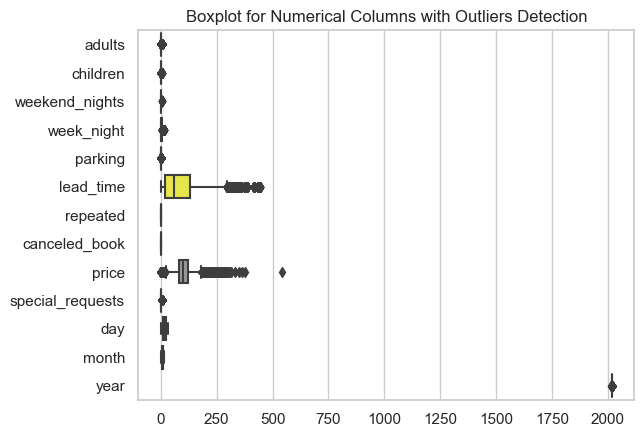

In [46]:
# Create a horizontal boxplot to visualize numerical data and identify outliers
sns.boxplot(data=data, orient='h', palette='Set1')
plt.title('Boxplot for Numerical Columns with Outliers Detection')
plt.show()

In [47]:
def handle_outliers(data, method='iqr', threshold=1.5, columns=None):
    """
    Handle outliers in numerical columns of a DataFrame.

    Parameters:
    - data: DataFrame or Series
    - method: 'iqr' for interquartile range, 'z-score' for z-score method
    - threshold: Number of standard deviations for z-score method or a multiplier for IQR method
    - columns: List of columns to handle outliers (default is all columns)

    Returns:
    DataFrame or Series without outliers based on the specified method and threshold.
    """
    if columns is None:
        columns = data.columns if isinstance(data, pd.DataFrame) else [data.name]

    if method == 'iqr':
        for column in columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'z-score':
        for column in columns:
            z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
            data = data[z_scores <= threshold]

    return data


In [48]:
# Handle outliers in the 'price' and 'lead_time' columns using z-score method
data = handle_outliers(data, method='z-score', columns=['price', 'lead_time'], threshold=1.5)

In [49]:
data.shape

(28424, 17)

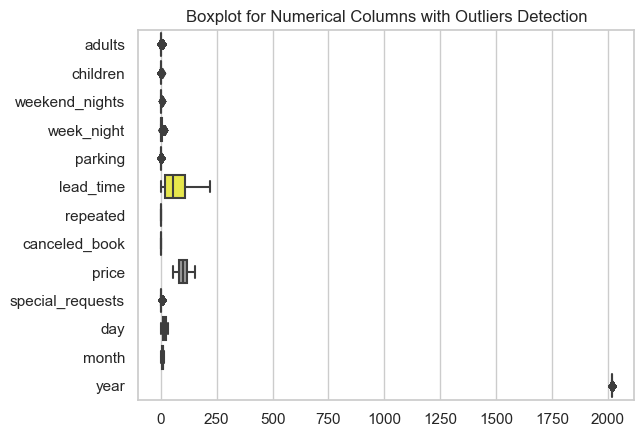

In [50]:
# Create a horizontal boxplot to visualize numerical data and identify outliers
sns.boxplot(data=data, orient='h', palette='Set1')
plt.title('Boxplot for Numerical Columns with Outliers Detection')
plt.show()


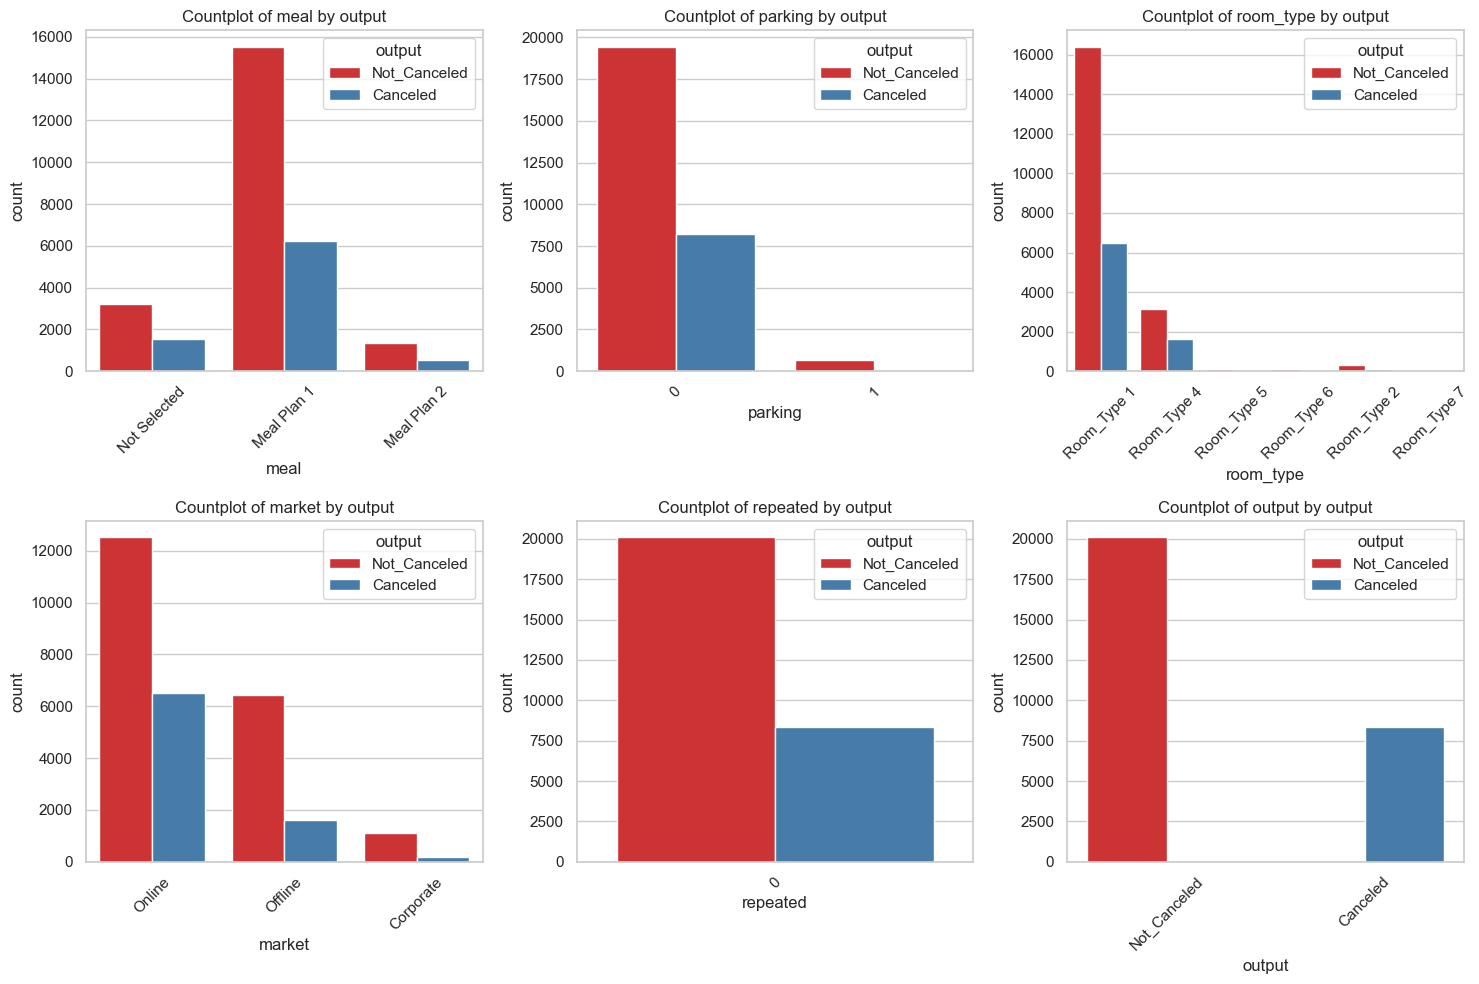

In [51]:
# List of categorical columns to visualize
categorical_columns = ['meal', 'parking', 'room_type', 'market', 'repeated', 'output']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical column and create a countplot
for i, column in enumerate(categorical_columns, 1):
    # Create a subplot in a 2x3 grid
    plt.subplot(2, 3, i)
    
    # Create a countplot for the current categorical column, with hue 'output'
    sns.countplot(x=column, data=data, hue='output', palette='Set1')
    
    # Set the title for the subplot
    plt.title(f'Countplot of {column} by output')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

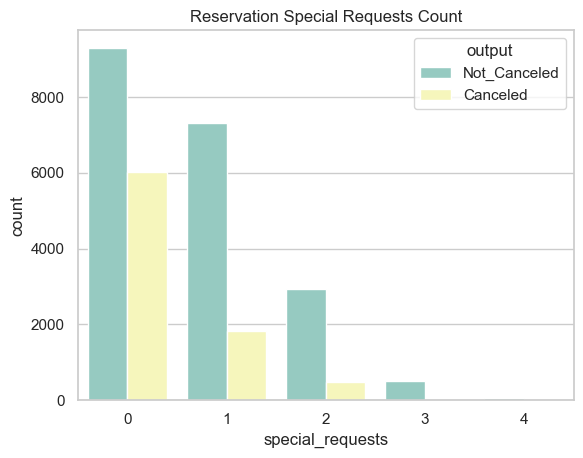

In [52]:
# Create a countplot for 'special_requests' with hue 'output' using Seaborn
ax = sns.countplot(data=data, x='special_requests', hue='output', palette='Set3')

# Set the title for the countplot
ax.set_title('Reservation Special Requests Count')

# Show the plot
plt.show()

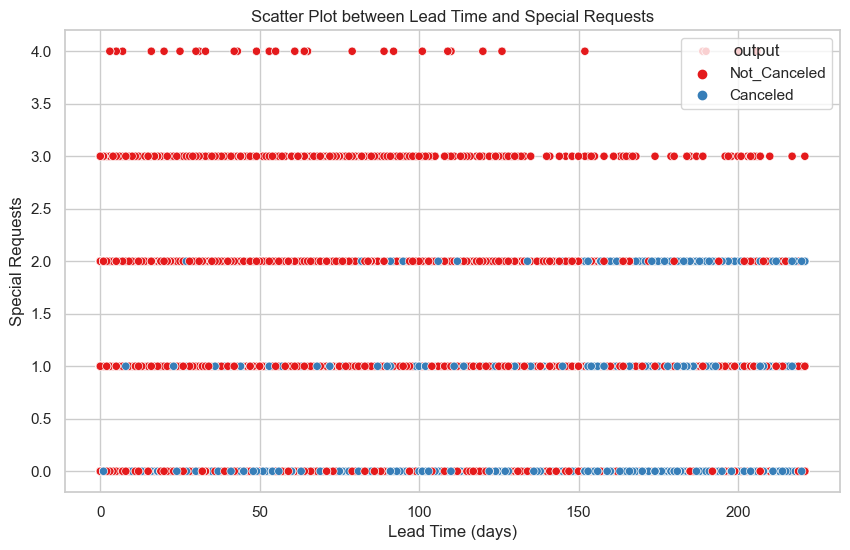

In [53]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot for 'lead_time' vs 'special_requests' with hue 'output' using Seaborn
sns.scatterplot(data=data, x="lead_time", y='special_requests', hue='output', palette='Set1')

# Set the title for the scatter plot
plt.title('Scatter Plot between Lead Time and Special Requests')

# Set labels for x and y axes
plt.xlabel('Lead Time (days)')
plt.ylabel('Special Requests')

# Show the plot
plt.show()

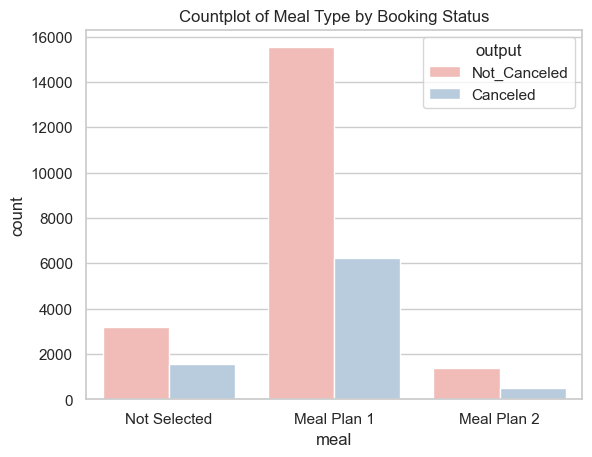

In [54]:
# Define a custom color palette (Pastel1)
custom_palette = sns.color_palette("Pastel1")

# Create a countplot for 'meal' with hue 'output' using Seaborn
sns.countplot(x='meal', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Meal Type by Booking Status')

# Show the plot
plt.show()

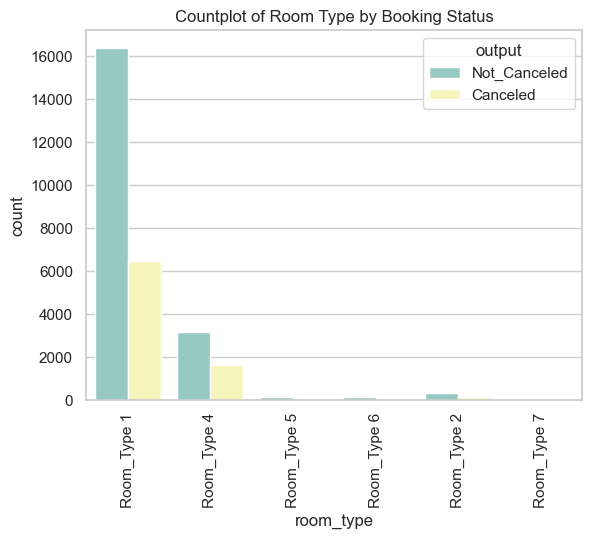

In [55]:
# Define a custom color palette (Set3)
custom_palette = sns.color_palette("Set3")

# Create a countplot for 'room_type' with hue 'output' using Seaborn
sns.countplot(x='room_type', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Room Type by Booking Status')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

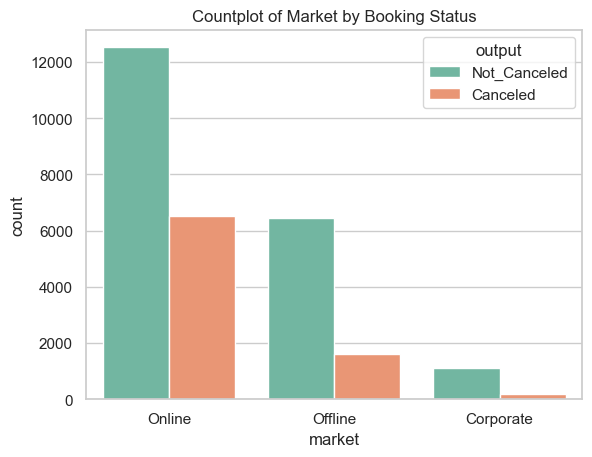

In [56]:
# Define a custom color palette (Set2)
custom_palette = sns.color_palette("Set2")

# Create a countplot for 'market' with hue 'output' using Seaborn
sns.countplot(x='market', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Market by Booking Status')

# Show the plot
plt.show()

__________________________________________________________________


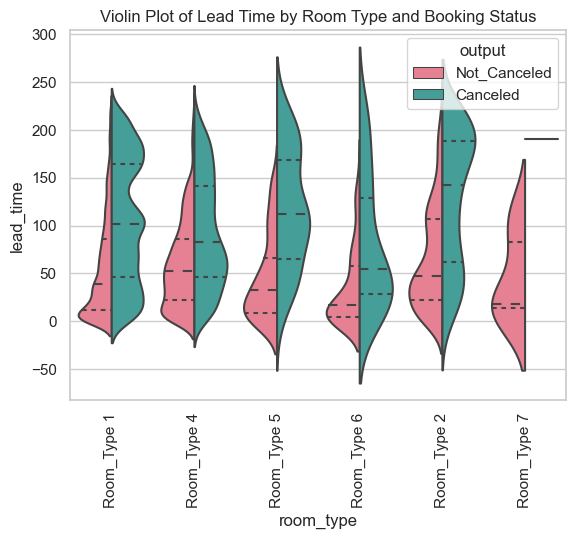

In [57]:
# Violin plot with customized appearance
sns.violinplot(x='room_type', y='lead_time', data=data, hue='output', split=True,
               palette='husl', inner='quartile', scale='width')
plt.xticks(rotation=90)
plt.title('Violin Plot of Lead Time by Room Type and Booking Status')
plt.show()


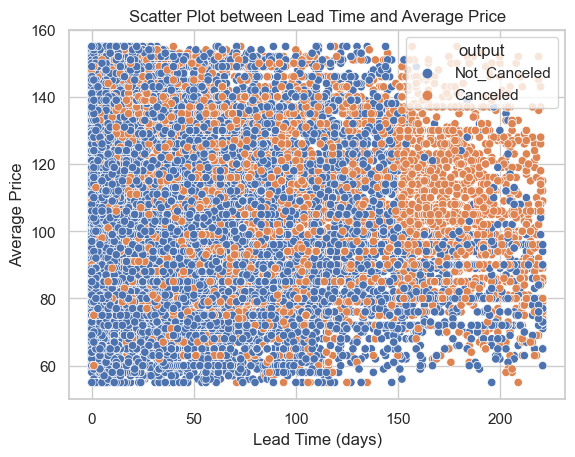

In [58]:
# Create a scatter plot for 'lead_time' vs 'price' with hue 'output' using Seaborn
sns.scatterplot(x='lead_time', y='price', data=data, hue='output')

# Set the title for the scatter plot
plt.title('Scatter Plot between Lead Time and Average Price')

# Set labels for x and y axes
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Price')

# Show the plot
plt.show()

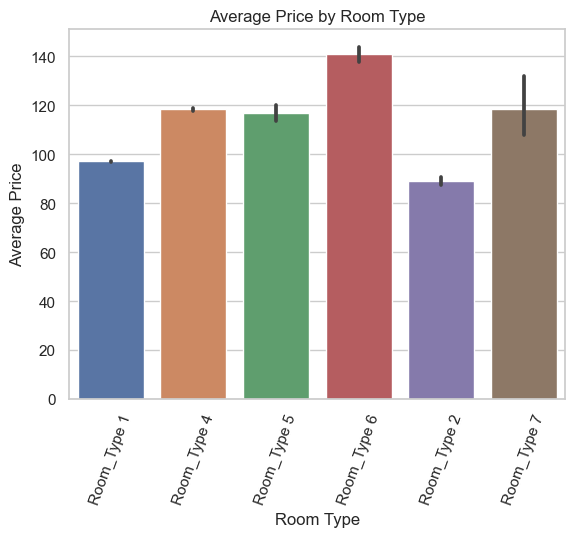

In [59]:
# Create a bar plot for average price by room type using Seaborn
sns.barplot(x='room_type', y='price', data=data)

# Set the title for the bar plot
plt.title('Average Price by Room Type')

# Set labels for x and y axes
plt.xlabel('Room Type')
plt.ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=70)

# Show the plot
plt.show()

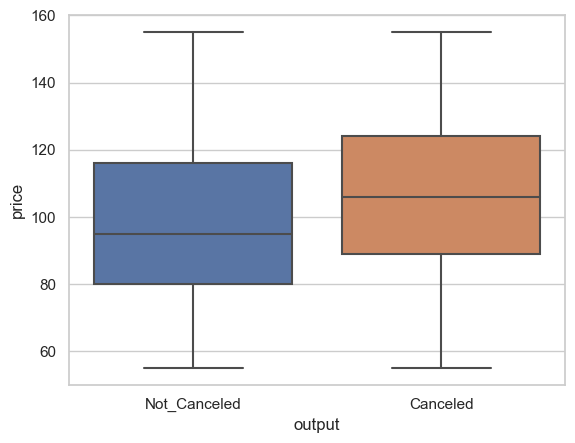

In [60]:
sns.boxplot(x='output', y='price', data=data)
plt.show()

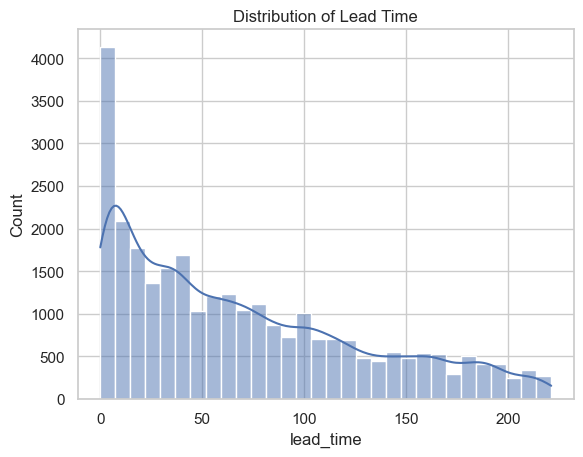

In [61]:
# Create a histogram for the distribution of lead time using Seaborn
sns.histplot(data['lead_time'], bins=30, kde=True)

# Set the title for the histogram
plt.title('Distribution of Lead Time')

# Show the plot
plt.show()

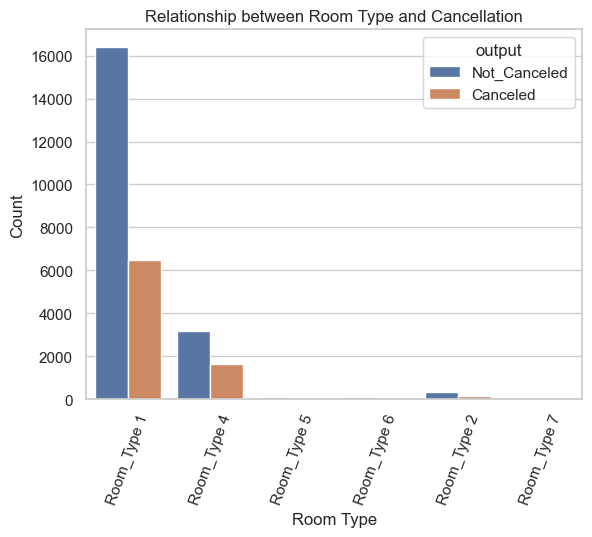

In [62]:
# Create a countplot for the relationship between room type and cancellation using Seaborn
sns.countplot(x='room_type', hue='output', data=data)

# Set the title for the countplot
plt.title('Relationship between Room Type and Cancellation')

# Set labels for x and y axes
plt.xlabel('Room Type')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=70)

# Show the plot
plt.show()

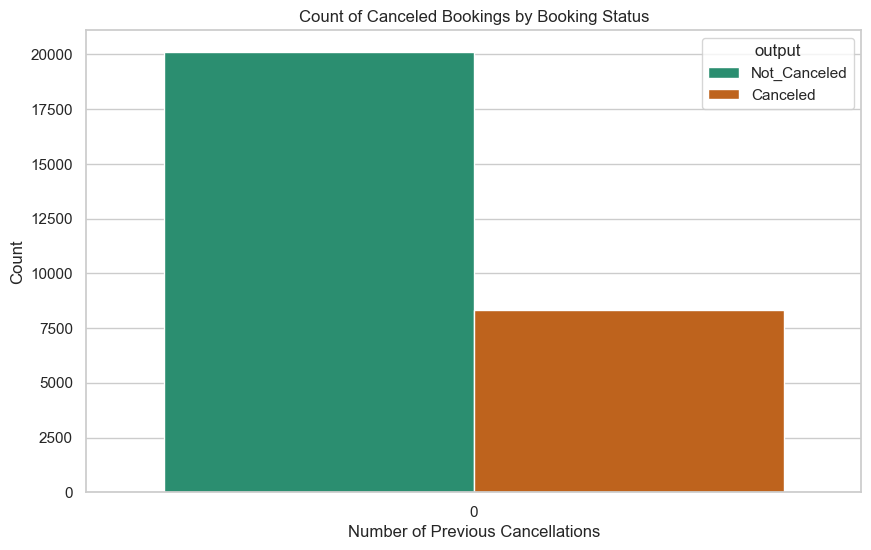

In [63]:
# Improved styling with a different color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='canceled_book', hue='output', palette='Dark2')

# Set the title of the plot
ax.set_title('Count of Canceled Bookings by Booking Status')

# Set labels for the axes
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')

# Display the plot
plt.show()


### Feature engineering 

In [64]:
data["num of people"]=data['adults']+data['children']

In [65]:
data['nights']=data['week_night']+data['weekend_nights']

In [66]:
data.drop(['adults','children','week_night','weekend_nights','day','month','year'],axis=1,inplace=True)

In [67]:
#data.to_csv(r"C:\Users\moham\OneDrive\Documents\my track\Internships\Cellula\First project\Modeling\real_data.csv",index=False)

## **Encoding**

In [68]:
categorical_data=data.select_dtypes("object").columns
print(categorical_data)

Index(['meal', 'room_type', 'market', 'output'], dtype='object')


In [69]:
data

,meal,parking,room_type,lead_time,market,repeated,canceled_book,price,special_requests,output,num of people,nights
1,Not Selected,0,Room_Type 1,5,Online,0,0,106,1,Not_Canceled,1,4
3,Meal Plan 1,0,Room_Type 1,211,Online,0,0,100,1,Canceled,1,2
4,Not Selected,0,Room_Type 1,48,Online,0,0,77,0,Canceled,1,3
6,Meal Plan 1,0,Room_Type 1,34,Online,0,0,107,1,Not_Canceled,2,5
7,Meal Plan 1,0,Room_Type 4,83,Online,0,0,105,1,Not_Canceled,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
36279,Not Selected,0,Room_Type 1,48,Online,0,0,94,0,Canceled,2,2
36281,Meal Plan 1,0,Room_Type 1,34,Online,0,0,107,1,Not_Canceled,2,4
36282,Meal Plan 1,0,Room_Type 4,83,Online,0,0,105,1,Not_Canceled,2,4
36283,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,96,1,Not_Canceled,3,4


In [70]:
# Encode categorical columns using LabelEncoder
for col in categorical_data:
    data[col] = LabelEncoder().fit_transform(data[col])

In [71]:
data

,meal,parking,room_type,lead_time,market,repeated,canceled_book,price,special_requests,output,num of people,nights
1,2,0,0,5,2,0,0,106,1,1,1,4
3,0,0,0,211,2,0,0,100,1,0,1,2
4,2,0,0,48,2,0,0,77,0,0,1,3
6,0,0,0,34,2,0,0,107,1,1,2,5
7,0,0,2,83,2,0,0,105,1,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
36279,2,0,0,48,2,0,0,94,0,0,2,2
36281,0,0,0,34,2,0,0,107,1,1,2,4
36282,0,0,2,83,2,0,0,105,1,1,2,4
36283,0,0,0,121,1,0,0,96,1,1,3,4


## **Splitting**

#### Save all data

In [72]:
#data.to_csv(r"C:\Users\moham\OneDrive\Documents\my track\Internships\Cellula\First project\Modeling\data.csv",index=False)

In [73]:
# # Separate the features (X) and the target variable (y)
# x = data.drop('output', axis=1)
# y = data['output']

In [74]:
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)